# **Bokeh:**

**Benefits**

- Allows for interactive figures

- Intuitive


**Neutral**

- Uses ColumnDataSource to read data
    - Collection of arrays of data (columns) that can be referred to by names
    -  Simpler version of DataFrame
    

### Bar graph

In [8]:
# Import library
from bokeh.io import show, output_file
from bokeh.plotting import figure

output_file("bars.html")

Grades = ['A', 'B', 'C', 'D', 'E', 'F']
number = [6, 7, 3, 1, 2, 1]

p = figure(x_range=Grades, plot_height=250, title="Grade distribution",
           toolbar_location=None, tools="")

p.vbar(x=Grades, top=number, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

### Scatter plot

In [9]:
# Import pandas as pd
import pandas as pd

# Read in the CSV file: df
# Can upload CSV files to Jupyter Notebook and right click to copy path
df = pd.read_csv('Sites/images/yearly_deaths_by_clinic.csv')

# Import figure from bokeh.plotting
from bokeh.plotting import figure 

# Create the figure: p
p = figure(x_axis_label='Year', y_axis_label='Births')

# Plot x vs y
p.circle(df['year'], df['births'], size=10)

# Show the result
show(p)



### Interactive features- HoverTool

In [13]:
# Import modules
from bokeh.plotting import ColumnDataSource, figure
from bokeh.models import HoverTool
import pandas as pd

# Read in dataset
df = pd.read_csv('Sites/images/yearly_deaths_by_clinic.csv')

# Create a ColumnDataSource from df: source
source = ColumnDataSource(df)

# Create a figure with the "box_select" tool: p
p = figure(x_axis_label='year', y_axis_label='deaths', tools='box_select')

# Add circle glyphs to the figure p with the selected and non-selected properties
p.circle(selection_color='red', nonselection_alpha=.1, x='year', y='deaths', source=source)

# Create a HoverTool: hover
hover = HoverTool(tooltips=None, mode='vline')

# Add the hover tool to the figure p
p.add_tools(hover)

# Specify the name of the output file and show the result
show(p)



### Additional widgets

**Buttons**

In [4]:
from bokeh.io import output_file, show
from bokeh.models.widgets import Button, TextInput

output_file("button.html")

button = Button(label="Button!", button_type="primary")

def my_text_input_handler(attr, old, new):
    print("Previous label: " + old)
    print("Updated label: " + new)

text_input = TextInput(value="default", title="Label:")
text_input.on_change("value", my_text_input_handler)

show(button)

**Sliders**

*Basic sliders*

In [5]:
# Perform the necessary imports
from bokeh.io import curdoc
from bokeh.layouts import widgetbox
from bokeh.models import Slider

# Create a slider: slider
slider = Slider(title='my slider', start=0, end=10, step=0.1, value=2)

# Create a widgetbox layout: layout
layout = widgetbox(slider)

# Add the layout to the current document
curdoc().add_root(layout)

show(layout)

*Connect slider to figure*

In [11]:
# Import modules
import numpy as np

from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

# Define variables
x = np.linspace(0, 10, 500)
y = np.sin(x)

# Define source
source = ColumnDataSource(data=dict(x=x, y=y))

# Originate graph
plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var A = amp.value;
    var k = freq.value;
    var phi = phase.value;
    var B = offset.value;
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

# Define slider
amp_slider = Slider(start=0.1, end=10, value=1, step=.1,
                    title="Amplitude", callback=callback)
callback.args["amp"] = amp_slider

freq_slider = Slider(start=0.1, end=10, value=1, step=.1,
                     title="Frequency", callback=callback)
callback.args["freq"] = freq_slider

phase_slider = Slider(start=0, end=6.4, value=0, step=.1,
                      title="Phase", callback=callback)
callback.args["phase"] = phase_slider

offset_slider = Slider(start=-5, end=5, value=0, step=.1,
                       title="Offset", callback=callback)
callback.args["offset"] = offset_slider

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_file("slider.html", title="slider.py example")

show(layout)

**Tab Panes**

In [12]:
# Import modules
from bokeh.models import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure

output_file("slider.html")

# Define first graph
p1 = figure(plot_width=300, plot_height=300)
p1.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=10, color="navy", alpha=0.5)
tab1 = Panel(child=p1, title="Circle")

#Define second graph
p2 = figure(plot_width=300, plot_height=300)
p2.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=3, color="navy", alpha=0.5)
tab2 = Panel(child=p2, title="Line")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

Documentation and additional widgets:
https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/widgets.html

# **Altair:**

**Benefits**

- Interactive
- Includes vega_datasets, which has many different datasets from which to work
    - Vega is grammar for interactive graphics, uses JSON syntax
    - Repository at https://github.com/vega/vega-datasets
- To view available datasets, use data.list_datasets()

    

In [3]:
data.list_datasets()

['7zip',
 'airports',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'weather',
 'weball26',
 'wheat',
 'world-110m',
 'zipcodes']

**Drawbacks**

- Need to install it seperately

**Altair installation**
    
- Open Terminal
- Run the following command: '$ conda install -c conda-forge altair vega_datasets jupyterlab'
- Indicate 'yes,' you do want to install altair
- After completion, run the command 'jupyterlab' to open a notebook on your local server

## Choropleth

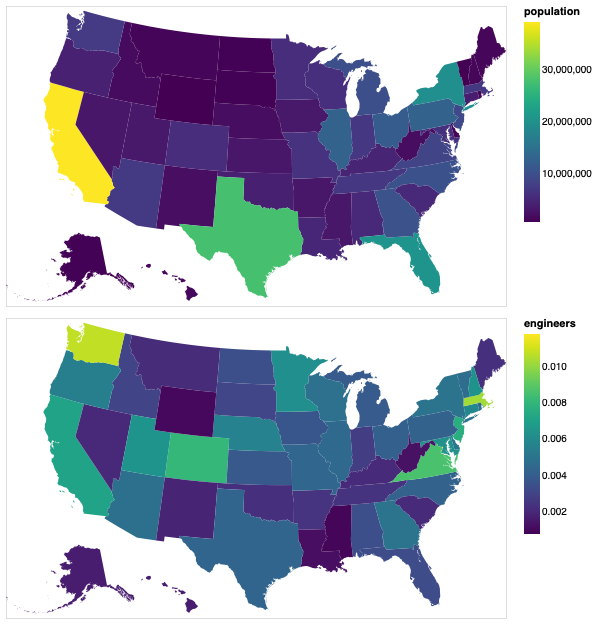

In [111]:
# Import modules
import altair as alt
from vega_datasets import data

# Define data
states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers']

# Define parameters
alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

### Interactive scatterplot

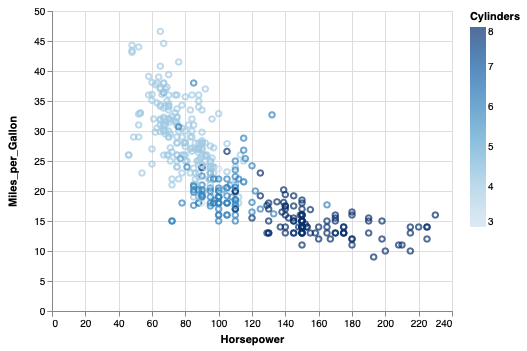

In [104]:
# Import modules
import altair as alt
from vega_datasets import data

# Import data
source = data.cars()

#Specify parameters
alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Cylinders',
    tooltip='Cylinders'
).interactive()

There are many more types of graphs available, see https://altair-viz.github.io for documentation